### 영화 일별 박스오피스 추출하는 법

In [42]:
import pandas as pd
# import datetime
from datetime import datetime
from datetime import timedelta
import requests
import numpy as np
import matplotlib.pyplot as plt
# %matplotlibinline

In [2]:
key1 = 'ca3f4432da66e0556de8179d18762a19'
key2 = 'ca3f4432da66e0556de8179d18762a19'
# # url = 'http://www.kobis.or.kr'
# MovieUrl = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json?key=ca3f4432da66e0556de8179d18762a19&openStartDt=2016%itemPerPage =100'
# MoviePage =  requests(MovieUrl)
# # para = MOOVIE_INFO_URL
# # encText = urllib.parse.quote("")
target_dt = datetime.now() - timedelta(days = 1000) # 현재날자에서 -1한 날(일)_
target_dt_str = target_dt.strftime('%Y%m%d')

In [3]:
def Data_Crawling(start_date, end_date, keys = key1 ):
    final_list = []
    url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json'
    
    for single_date in pd.date_range(start_date, end_date ):
        for multi, rep in zip(['Y', 'Y', 'N', 'N'], ['K','F', 'K', 'F']) :
            payload = {
                'key' : keys,
                'targetDt' : single_date.strftime('%Y%m%d'),
                'itemPerPage' : '10',
                'multiMovieYn' : multi,
                'repNationCd' : rep
            }
            req = requests.get(url, params = payload)
            
            for item in req.json()['boxOfficeResult']['dailyBoxOfficeList']:
                temp_list = []
                key_list = []
                for key, value in item.items():
                    key_list.append(key)
                    temp_list.append(value)
                    
                temp_list.append(single_date)
                key_list.append('CurrentDate')
                
                temp_list.append(multi)
                key_list.append('multi')
                
                temp_list.append(rep)
                key_list.append('Nation')
                
                #t temp_list에는 내용, key_list에는 헤더
                final_list.append(temp_list)
                
        return pd.DataFrame(final_list, columns = key_list)
    
movie = Data_Crawling("2017-01-01", "2018-03-01", keys = key1)
movie.to_csv('2016movie.csv', index = False)

In [4]:
movie = pd.read_csv("2016movie.csv")
# # movie.replace{'Nation'}
# if movie['Nation'] == 'K':
#     movie[]
# else movie['Nation'] == 'F':
#     movie['Nation'] == 1

In [5]:
movie

### Y는 상업용 영화인지 구분
# 국가는 k가 국내, 이외에는 외국 영화
# currentDate 는 현재 검색일, 여기에 상열일을 조금 바꾼다


,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,...,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,CurrentDate,multi,Nation
0,1,1,0,OLD,20161701,위켄즈,2016-12-22,765700,30.0,-964300,...,17988700,93,-101,-52.1,2354,10,11,2017-01-01,Y,K
1,2,2,4,OLD,20161603,순종,2016-11-17,447000,17.5,241000,...,385404200,73,48,192.0,54529,2,2,2017-01-01,Y,K
2,3,3,-1,OLD,20162545,"무현, 두 도시 이야기",2016-10-26,410000,16.1,-309600,...,1511840600,60,-35,-36.8,192728,5,6,2017-01-01,Y,K
3,4,4,-1,OLD,20159286,연애담,2016-11-17,315000,12.4,-149000,...,183011100,38,-26,-40.6,22418,3,3,2017-01-01,Y,K
4,5,5,-1,OLD,20164527,부릉! 부릉! 브루미즈: 스피더의 모험 일기,2016-12-15,186000,7.3,-76500,...,81314500,21,-12,-36.4,10229,3,3,2017-01-01,Y,K
5,6,6,2,OLD,20153401,파파좀비,2016-12-29,109000,4.3,-28500,...,1704500,18,0,0.0,274,4,4,2017-01-01,Y,K
6,7,7,0,OLD,20162608,나의 살던 고향은,2016-11-24,84000,3.3,-67000,...,81080600,12,-8,-40.0,10698,2,2,2017-01-01,Y,K
7,8,8,7,OLD,20163011,우리 손자 베스트,2016-12-08,73000,2.9,53000,...,11442500,11,7,175.0,1957,2,2,2017-01-01,Y,K
8,9,9,0,NEW,20169730,당신자신과 당신의 것,2016-11-10,89000,3.5,89000,...,145651200,10,10,100.0,17894,1,1,2017-01-01,Y,K
9,10,10,0,NEW,20154428,야근 대신 뜨개질,2016-11-17,48000,1.9,48000,...,8286500,7,7,100.0,1239,1,1,2017-01-01,Y,K


In [6]:
movie_list = pd.DataFrame({'movieCd' :movie.movieCd.drop_duplicates(), 'Rate' : 0})

In [7]:
movie_list

,movieCd,Rate
0,20161701,0
1,20161603,0
2,20162545,0
3,20159286,0
4,20164527,0
5,20153401,0
6,20162608,0
7,20163011,0
8,20169730,0
9,20154428,0


In [29]:
movie_list2 = []
movie_list2.append(movie_list['movieCd'])


In [30]:
movie_list2

[0     20161701
 1     20161603
 2     20162545
 3     20159286
 4     20164527
 5     20153401
 6     20162608
 7     20163011
 8     20169730
 9     20154428
 10    20161763
 11    19890291
 12    20160221
 13    19930396
 14    20166401
 15    19920315
 16    20164526
 17    20080975
 18    20128588
 19    20164855
 20    20161725
 21    20144641
 22    20152371
 23    20154661
 24    19550028
 25    20163963
 26    20167689
 27    20163183
 28    20162025
 29    20167904
 30    20161872
 31    20162727
 32    20162183
 33    20165285
 34    20165543
 35    20162365
 36    20156062
 Name: movieCd, dtype: int64]

In [33]:
import json

def crawl_movie_data(lists, keys = key1) :
    
    dict_list = dict()
    url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json'
    
    for movie in lists :
        print(movie)
        payload={
        'key' : keys,
        'movieCd' : movie_list['movieCd'][1]
        }
        
        req = requests.get(url, params = payload)
        
        ## 각 영화 코드가 key, 그 결과값으로 나온 json 항목들이 value가 된다.
        dict_list[movie] = req.json()['movieInfoResult']['movieInfo']

    return dict_list
   
movie_detail = crawl_movie_data(movie_list)

with open('detail.txt', 'w') as outfile:  
    json.dump(movie_detail, outfile)
# with open('detail.txt', 'r') as f :
#     movie_detail = json.load(f)

# from IPython.display import clear_output

# for i in range(len(movie_list)) :    
#     url = 'https://openapi.naver.com/v1/search/movie.json'
#     payload = {
#         'query' : b[movie_list.iloc[i, 0]]['movieNm']
#         , 'display' : 10
#     }

#     headers = {
#         'X-Naver-Client-Id' : 'API Client ID',
#         'X-Naver-Client-Secret' : 'API Client Secret'
#     }
    
        
    
#     if  (movie_list.iloc[i,1] == 0) | (movie_list.iloc[i,1] == 'NA') :
#         print(movie_list.iloc[i,0], movie_detail[movie_list.iloc[i, 0]]['movieNm'] + movie_detail[movie_list.iloc[i, 0]]['movieNmEn'] )

#         try :
#             req = requests.get(url, headers=headers, params=payload)
#             req.json()['total']
#         except :
#             print("ERROR!")
#             movie_list.iloc[i,1] = "NA"
#         else :
#             if(req.json()['total'] == 1) :
#                 print(req.json()['items'][0]['userRating'])
#                 movie_list.iloc[i,1] = req.json()['items'][0]['userRating']
#             else :
#                 print(movie_detail[movie_list.iloc[i,0]]['directors'])
#                 inp = input('Type Rating')
#                 movie_list.iloc[i,1] = float(inp)
#                 clear_output()    

movieCd
Rate


In [34]:
movie_detail

{'movieCd': {'movieCd': '20161603',
  'movieNm': '순종',
  'movieNmEn': 'Obedience',
  'movieNmOg': '',
  'showTm': '88',
  'prdtYear': '2016',
  'openDt': '20161117',
  'prdtStatNm': '개봉',
  'typeNm': '장편',
  'nations': [{'nationNm': '한국'}],
  'genres': [{'genreNm': '다큐멘터리'}],
  'directors': [{'peopleNm': '김동민', 'peopleNmEn': ''},
   {'peopleNm': '이주훈', 'peopleNmEn': ''}],
  'actors': [{'peopleNm': '최강희',
    'peopleNmEn': 'CHOI Gang-hee',
    'cast': '내레이션',
    'castEn': ''},
   {'peopleNm': '최수종',
    'peopleNmEn': 'CHOI Soo-jong',
    'cast': '내레이션',
    'castEn': ''},
   {'peopleNm': '김은혜', 'peopleNmEn': '', 'cast': '', 'castEn': ''},
   {'peopleNm': '김영화',
    'peopleNmEn': '',
    'cast': '나오는 사람들 (레바논)',
    'castEn': ''}],
  'showTypes': [{'showTypeGroupNm': '2D', 'showTypeNm': '디지털'}],
  'companys': [{'companyCd': '20157988',
    'companyNm': '(재)CBS',
    'companyNmEn': '',
    'companyPartNm': '제작사'},
   {'companyCd': '20157988',
    'companyNm': '(재)CBS',
    'companyNmEn':

In [35]:
# 개봉일이 2017년에 속한 영화
movie_use = movie[ (movie.openDt >= '2017-01-01') & (movie.openDt <= '2017-12-31')]
## 중복항을 제거해서 고유한 영화 목록을 뽑아내고
movie_use = movie_use.movieCd.drop_duplicates()
## 그 목록에 속하는 영화만을 다시 남긴다
movie = movie[movie.movieCd.isin(movie_use)]
## 영화 목록도 업데이트해준다
movie_list = movie_list[movie_list.movieCd.isin(movie_use)]


In [36]:
movie_group = movie.groupby(['movieCd'])
dat1 = pd.DataFrame({

                     ## 사실 여기서 sum()을 제외한 max, min 함수는 의미가 없다. (오브젝트/문자열이다)
                    'movieNm' : movie_group['movieNm'].max(),
                    'sales' : movie_group['salesAmt'].sum(),
                    'screen' : movie_group['scrnCnt'].sum(),
                    'show' : movie_group['showCnt'].sum(),
                    'audience' : movie_group['audiCnt'].sum(),
                    'multi' : movie_group['multi'].max(),
                    'nation' : movie_group['Nation'].max(),
                    'openDate' : movie_group['openDt'].min()
                    }).reset_index()
     
top10 = dat1.sort_values(by='sales', ascending=False).head(10).reset_index()

In [18]:
with open('detail.txt', 'r') as f :
    movie_detail = json.load(f)

from IPython.display import clear_output

for i in range(len(movie_list)) :    
    url = 'https://openapi.naver.com/v1/search/movie.json'
    payload = {
          'query' : b[movie_list.iloc[i, 0]]['movieNm'],
          'display' : 10
    }

    headers = {
        'X-Naver-Client-Id' : 'zjLWj2ZcSQexKU1_owfG',
        'X-Naver-Client-Secret' : 'zjLWj2ZcSQexKU1_owfG'
    }
    
        
    
    if  (movie_list.iloc[i,1] == 0) | (movie_list.iloc[i,1] == 'NA') :
        print(movie_list.iloc[i,0], movie_detail[movie_list.iloc[i, 0]]['movieNm'] + movie_detail[movie_list.iloc[i, 0]]['movieNmEn'] )

        try :
            req = requests.get(url, headers=headers, params=payload)
            req.json()['total']
        except :
            print("ERROR!")
            movie_list.iloc[i,1] = "NA"
        else :
            if(req.json()['total'] == 1) :
                print(req.json()['items'][0]['userRating'])
                movie_list.iloc[i,1] = req.json()['items'][0]['userRating']
            else :
                print(movie_detail[movie_list.iloc[i,0]]['directors'])
                inp = input('Type Rating')
                movie_list.iloc[i,1] = float(inp)
                clear_output()

KeyError: 20161701

NameError: name 'ticker' is not defined

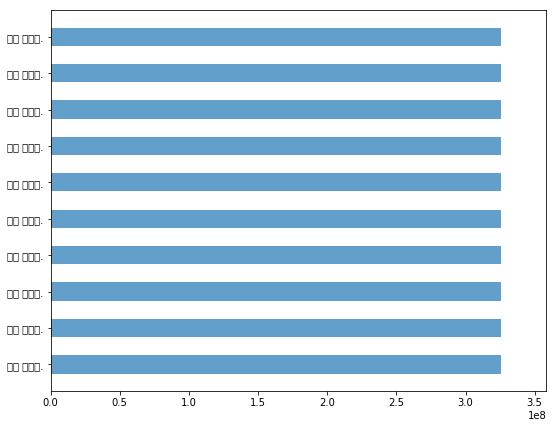

In [43]:
## 일반 숫자를 한글단위 '원'으로 읽히도록 만든 함수
def to_won(number):
    word = str(number)
    n = len(word)
    units = ['', '만', '억', '조']
    left = len(word)
    temp_list = []
    i = n
    j = 0
    while (left >= 4):
        temp_list.append(word[i - 4: i] + units[j])
        left = len(word[:i - 4])
        i -= 4
        j += 1
    if (left != 0):
        temp_list.append(word[:i] + units[j])
    return ' '.join(temp_list[::-1])


## 가로 바 차트(bar chart)를 그리는 과정
## matplotlib 홈페이지의 튜토리얼을 참고해 그렸다

fig, ax1 = plt.subplots(figsize=(9, 7))
fig.subplots_adjust(left=0.115, right=0.88)

pos = np.arange(10)

rects = ax1.barh(pos, top10.sales, align='center', height=0.5, tick_label=top10.movieNm, alpha=0.7)

ax1.set_xlim([0, top10.sales.max() * 1.1])
ax1.xaxis.set_major_locator(ticker.MaxNLocator(11))
ax1.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax1.set_title("매출 상위 10위 영화")
rect_labels = []
i = 0
for rect in rects:
    print(to_won(top10.sales[i]))
    if (top10['nation'][i] == 'K'):
        rect.set_color('r')
    else :
        rect.set_color('skyblue')

    width = int(rect.get_width())
    # print(width)
    rankStr = to_won(top10.sales[i])

    clr = 'white'
    align = 'right'
    xloc = width + 1
    yloc = rect.get_y() + rect.get_height() / 2.0
    label = ax1.text(xloc, yloc, rankStr, horizontalalignment=align,
                     verticalalignment='center', color=clr, weight='bold', clip_on=True)
    rect_labels.append(label)
    i += 1
plt.show()

In [38]:
## 스크린 대비 매출 칼럼을 추가해준다.
top10['sales/screen'] = top10.sales / top10.screen
top10 = top10.sort_values(by='sales/screen', ascending=False).reset_index(drop=True)

In [ ]:
Nation_list = pd.DataFrame({'movieCd': movie.movieCd.drop_duplicates(), 'movieNm':movie.movieNm,
                            'Nation': movie.Nation})

Nation_list['Nation'].str.replace("K", '0')
Nation_list['Nation'].str.replace("F", '1')
# Nation_list['Nation'] = Nation_list[].str.replace("K", "0")
# Nation_list['Nation' ] = Nation_list[F].str.replace("F", "1")

In [ ]:
Nation_list['Nation']

In [ ]:
movie_list = pd.DataFrame({'movieCd': movie.movieCd.drop_duplicates(), 'Rate': 0})
#영화들의 고유 코드를 mpvieCd에 넣는 식으로, 그리고 나중에 평점을 하기 위해 rate넣었다

In [ ]:
movie_list

### 영화 상세정보

In [ ]:
import json
import pickle
def crawl_movie_data(lists, keys = key1):
    
    dict_list = dict()
    url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json'
    
    for movie in lists :
        print(movie)
        payload={
        'key' : keys,
        'movieCd' : movie
        }
        
        req = requests.get(url, params = payload)
        
        ## 각 영화 코드가 key, 그 결과값으로 나온 json 항목들이 value가 된다.
        dict_list[movie] = req.json()['movieInfoResult']['movieInfo']

    return dict_list
   
movie_detail = crawl_movie_data(movie_list)

with open('detail.txt', 'w') as outfile:  
    json.dump(movie_detail, outfile)

In [ ]:
movie.loc[0:5]

In [ ]:
movie.loc[2]